In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


--a: 7662 rows, 4 cols. data types: Country or Area - object;  Year - int64; Value - float64; Value Footnotes - float64

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df = gdp_df[['Country or Area', 'Year', 'Value']]
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

--need to look up how to count distinct year values per country
--33 possible years. how many years/country?


In [6]:
gdp_df['Year'].min()

1990

In [7]:
gdp_df['Year'].max()

2022

In [25]:
gdp_df['Year'].nunique()

33

In [26]:
gdp_df['Country'].nunique()

242

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. 

starting with creating new df for only 2020

In [9]:
gdp_df_2020 = gdp_df[gdp_df["Year"] == 2020]
gdp_df_2020 = gdp_df_2020.sort_values('GDP_Per_Capita', ascending=True)
gdp_df_2020.head()


,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556


Now using the new df to create histogram:

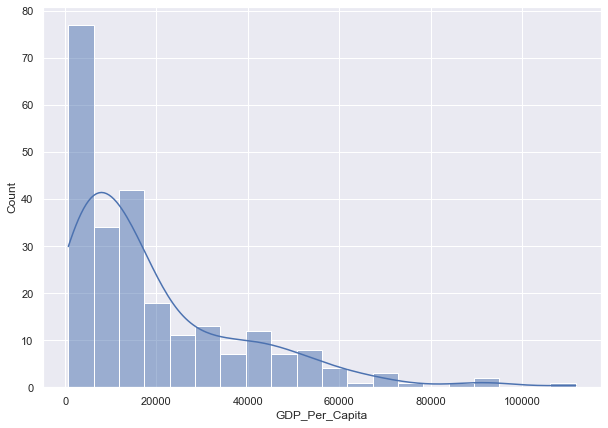

In [36]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))

sns.histplot(data=gdp_df_2020, x="GDP_Per_Capita", kde=True, bins=20)
plt.show()

Using new df to create density plot:

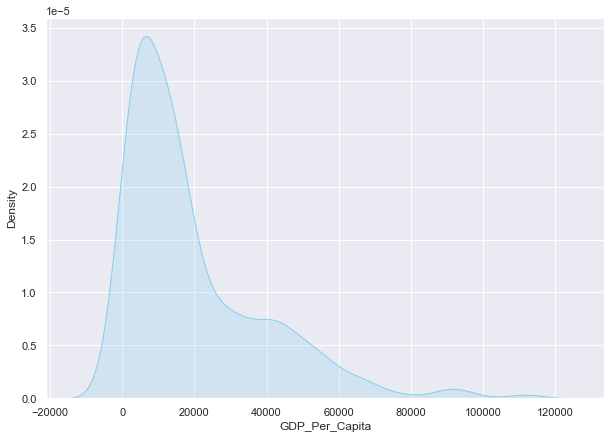

In [35]:
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

plt.figure(figsize=(10, 7))

# Large bandwidth
sns.kdeplot(gdp_df_2020['GDP_Per_Capita'], shade=True, bw_method=0.25, color="skyblue")
plt.show()

Using new df to create boxplot:

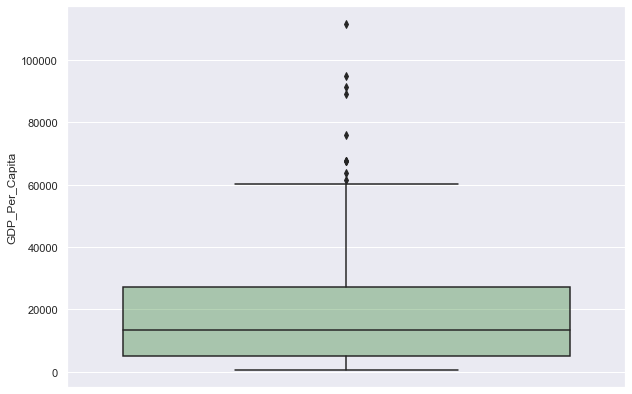

In [34]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))

ax = sns.boxplot(y=gdp_df_2020["GDP_Per_Capita"], color='green')
for patch in ax.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .3))
plt.show()

Using new df to create violin plot:

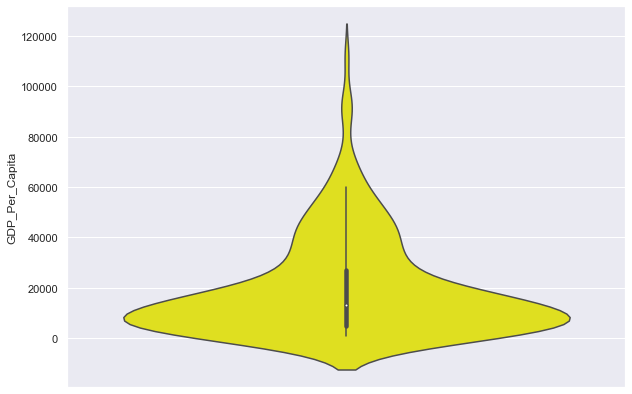

In [33]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))
    
# Make boxplot for one group only
sns.violinplot(y=gdp_df_2020["GDP_Per_Capita"], color='yellow')
plt.show()

What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

I notice that in the density plot and violin plot, I can see that there is data below 0, which I can't tell in the histogram or the boxplot. The histogram shows most clearly that in the values <20000, a large majority of them are in the 5000 bin.

9. What was the median GDP per capita value in 2020?
a: 13357.997573370474


In [14]:
gdp_df_2020['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [15]:
gdp_decades = gdp_df[ (gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020) ]

In [16]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


Using this, create the following 4 plots: A boxplot

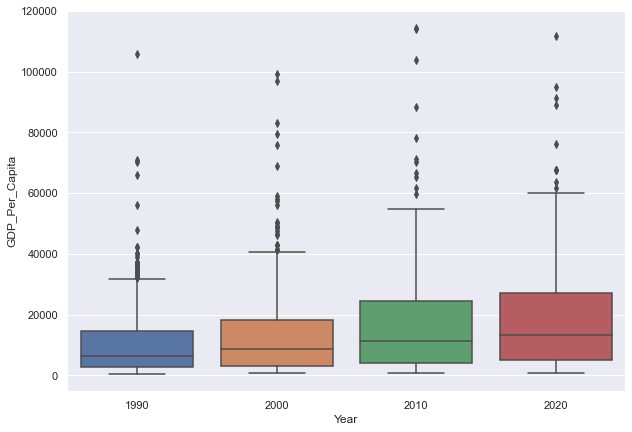

In [32]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 7))

sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

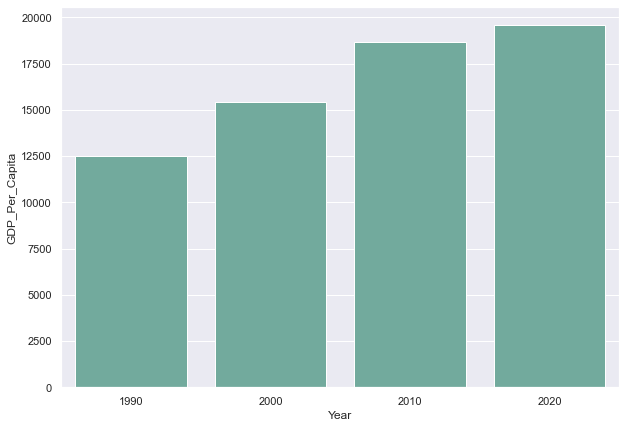

In [31]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x=gdp_decades["Year"], 
    y=gdp_decades['GDP_Per_Capita'], 
    data=gdp_decades, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');

A scatterplot:

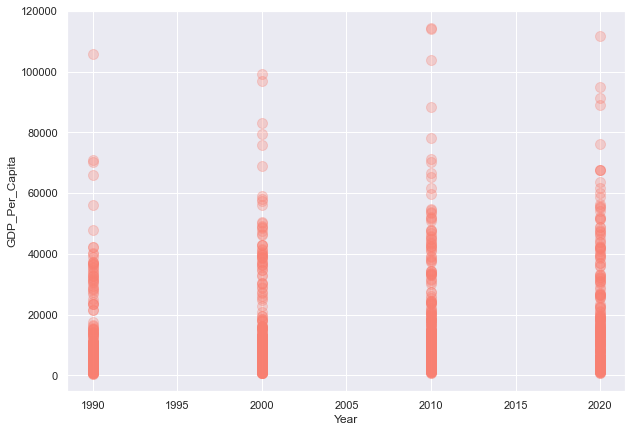

In [43]:
# customize color, transparency and size of the markers
plt.figure(figsize=(10, 7))

sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False, scatter_kws={"color":"salmon","alpha":0.3,"s":100} )

plt.show()

A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) 

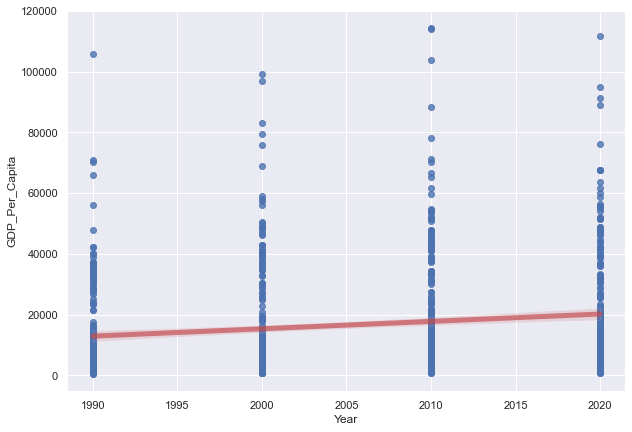

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
#df = sns.load_dataset('iris')

plt.figure(figsize=(10, 7))

# plot
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In general, the global GDP has grown over time. The boxplot and scatter plots illustrate the movement in the very top outliers and how very far above the median they are. The bar plot best illustrates the overall trend. I like the boxplot best because i can see the outliers as well as a better understanding of where the average lies.